# Exercise

For a BH of mass $M$, spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
Let us define $f= M_{\rm irr}/M$.

Suppose you have repeated measurments of $M$ and $\chi$. These distributions will be the *posterior samples* from a single measurement.

Let's assume that:

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.

7. Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint 1*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Hint 2*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. \label{pmirr}
\end{equation}

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.integrate
from astroML import stats as astroMLstats
from astropy.visualization.hist import hist
from sklearn.neighbors import KernelDensity

First of all, I define a function describing the irreducible mass of the black hole that I call once I have generated the mass and spin points (respectively $M$ and $\chi$). Consequently, I plot the histogram of the irreducible mass by using the Scott's rule and the Freedman-Diaconis' rule.

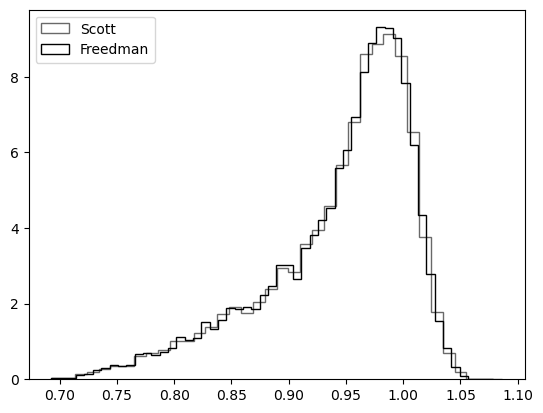

In [2]:
def M_irreducible(mass, spin): 
    return mass*np.sqrt((1+np.sqrt(1-spin*spin))/2)

sigma = 0.02
mu = 1
N = 10000

chi = uniform(0, 1).rvs(N)
M = norm(mu, sigma).rvs(N)
M_irr = M_irreducible(M, chi)

hist(M_irr, bins='scott', histtype='step', density=True, color='dimgrey', label='Scott')
hist(M_irr, bins='freedman', histtype='step', density=True, color='black', label='Freedman')
plt.legend()
plt.show()

To plot the distribution of $M_{irr}$ using a KDE, I define a KDE function ($KDE\_m$) to compute the pdf of the irreducible mass. The bandwidth is chosen by hand. In the first cell I try with a Gaussian kernel, in the second one with an Epanechnikov kernel.

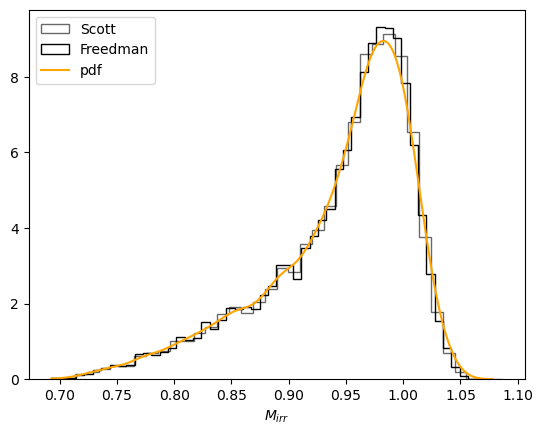

In [3]:
x = np.linspace(M_irr.min(), M_irr.max(), N)

def KDE_m(data, b, k):
    kde_skl = KernelDensity(bandwidth=b, kernel=k)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x[:, np.newaxis])  # sklearn returns log(density)

    return np.exp(log_pdf)

bandwidth = 0.01
kernelG = 'gaussian'
pdfG = KDE_m(M_irr, bandwidth, kernelG)

hist(M_irr, bins='scott', histtype='step', density=True, color='dimgrey', label='Scott')
hist(M_irr, bins='freedman', histtype='step', density=True, color='black', label='Freedman')
plt.plot(x, pdfG, color='orange', label='pdf')
plt.legend()
plt.xlabel(r'$M_{irr}$')
plt.show()

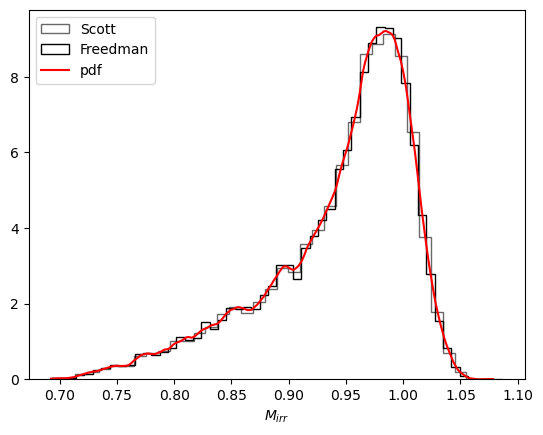

In [4]:
kernelE = 'epanechnikov'

pdfE = KDE_m(M_irr, bandwidth, kernelE)

hist(M_irr, bins='scott', histtype='step', density=True, color='dimgrey', label='Scott')
hist(M_irr, bins='freedman', histtype='step', density=True, color='black', label='Freedman')
plt.plot(x, pdfE, color='red', label='pdf')
plt.legend()
plt.xlabel(r'$M_{irr}$')
plt.show()

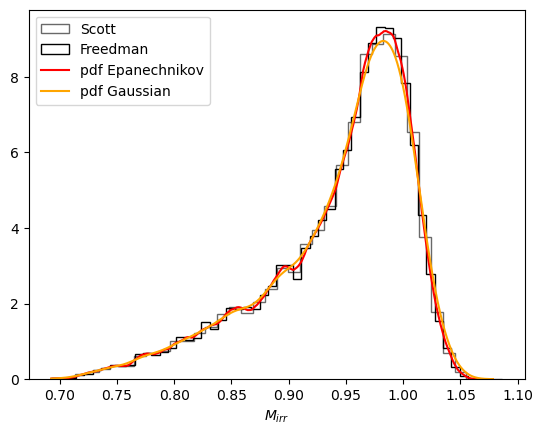

In [5]:
hist(M_irr, bins='scott', histtype='step', density=True, color='dimgrey', label='Scott')
hist(M_irr, bins='freedman', histtype='step', density=True, color='black', label='Freedman')
plt.plot(x, pdfE, color='red', label='pdf Epanechnikov')
plt.plot(x, pdfG, color='orange', label='pdf Gaussian')
plt.legend()
plt.xlabel(r'$M_{irr}$')
plt.show()

##### KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. KS distance between ${M_{\rm irr}}$ and ${M}$ as a function of $\sigma$.

To compute the KS distance I use $stats.ks\_2samp()$.

In [8]:
DM = stats.ks_2samp(M, M_irr)
Df = stats.ks_2samp(f, M_irr)

print('KS distance between M_irr and f: ', DM[0])
print('KS distance between M_irr and M: ', Df[0])

KS distance between M_irr and f:  0.5029
KS distance between M_irr and M:  0.1608


To study the behaviour of the KS distance as a function of $\sigma$, I define an array of standard deviations, and for each of them I compute the KS distance as before.

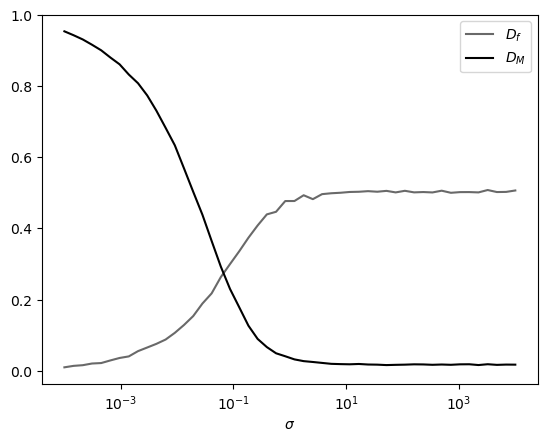

In [9]:
Sigma = np.logspace(-4, 4, 50)

KS_f = []
KS_M = []

for i in Sigma:
    Mass = norm(mu, i).rvs(N)
    Mass_irr = Mass*f
    
    KS_M.append(stats.ks_2samp(Mass, Mass_irr))
    KS_f.append(stats.ks_2samp(f, Mass_irr))

KS_M = np.array(KS_M)
KS_f = np.array(KS_f)

plt.plot(Sigma, KS_f[:, 0], color='dimgrey', label=r'$D_f$')
plt.plot(Sigma, KS_M[:, 0], color='black', label=r'$D_M$')
plt.legend()
plt.semilogx()
plt.xlabel(r'$\sigma$')
plt.show()

In [11]:
constantM = np.sum(KS_M[Sigma>10])/len(KS_M[Sigma>10])
constantf = np.sum(KS_f[Sigma>10])/len(KS_f[Sigma>10])

print(f'Constant value reached by KS_f: {constantf:.4f}')
print(f'Constant value reached by KS_M: {constantM:.4f}')

Constant value reached by KS_f: 0.5034
Constant value reached by KS_M: 0.1163


The more $\sigma$ increases the more the KS distance between $M_{irr}$ and $M$ (black line) decreases and the KS distance between $M_{irr}$ and $f$ (grey line) increases, up to a point at which they reach a constant behaviour (respectively $constantM = 0.1046$ and $constantf = 0.5026$).

I want now to compare the distributions for small values of sigma and high values of $\sigma$. I define two values of the standard deviation and I compare the corresponding distributions. N.B.: I change (by hand) the value of the bandwidth for the distribution with $\sigma=7.8$ because it results to be too small in the following plots.

In [12]:
s1 = 0.01
s2 = 7.8
bandwidth2 = 1

mass1 = norm(mu, s1).rvs(N)
M_irr1 = M_irreducible(mass1, chi)
f1 = M_irr1/mass1
mass2 = norm(mu, s2).rvs(N)
M_irr2 = M_irreducible(mass2, chi)
f2 = M_irr2/mass2

MIN = [min(mass1), min(mass2), min(f1), min(f2), min(M_irr1), min(M_irr2)]
MAX = [max(mass1), max(mass2), max(f1), max(f2), max(M_irr1), max(M_irr2)]
z = np.linspace(min(MIN), max(MAX), N)
gauss1 = norm(mu, s1).pdf(z)
gauss2 = norm(mu, s2).pdf(z)

def KDE_M(data, b, k):
    kde_skl = KernelDensity(bandwidth=b, kernel=k)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(z[:, np.newaxis])

    return np.exp(log_pdf)

PDF1 = KDE_M(M_irr1, bandwidth, kernelG)

def KDE_F(data, b, k):
    kde_skl = KernelDensity(bandwidth=b, kernel=k)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(z[:, np.newaxis])

    return np.exp(log_pdf)

PDF_f1 = KDE_F(f1, bandwidth, kernelG)

PDF2 = KDE_M(M_irr2, bandwidth2, kernelG)
PDF_f2 = KDE_F(f2, bandwidth2, kernelG)

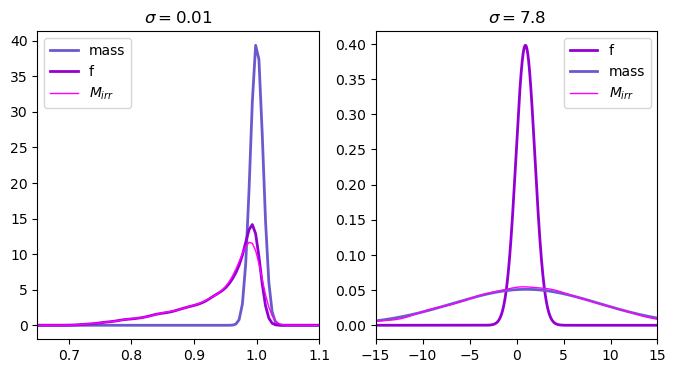

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(z, gauss1, color='slateblue', label='mass', lw=2)
ax1.plot(z, PDF_f1, color='darkviolet', label='f', lw=2)
ax1.plot(z, PDF1, color='fuchsia', label=r'$M_{irr}$', lw=1)
ax1.set_title(f'$\sigma = {s1}$')
ax1.set_xlim(0.65, 1.1)
ax1.legend()

ax2.plot(z, PDF_f2, color='darkviolet', label='f', lw=2)
ax2.plot(z, gauss2, color='slateblue', label='mass', lw=2)
ax2.plot(z, PDF2, color='fuchsia', label=r'$M_{irr}$', lw=1)
ax2.set_title(f'$\sigma = {s2}$')
ax2.set_xlim(-15, 15)

ax2.legend()

plt.show()

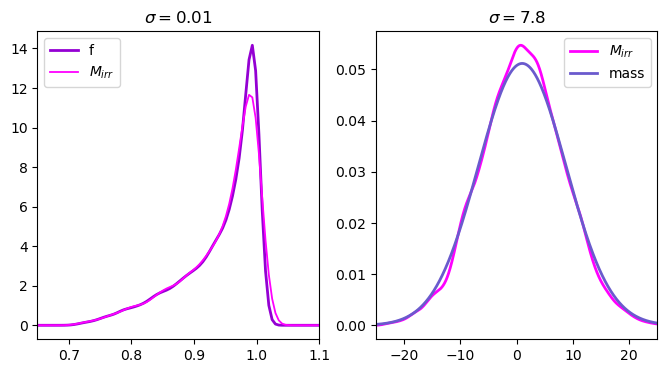

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(z, PDF_f1, color='darkviolet', label='f', lw=2)
ax1.plot(z, PDF1, color='fuchsia', label=r'$M_{irr}$', lw=1.3)
ax1.set_title(f'$\sigma = {s1}$')
ax1.set_xlim(0.65, 1.1)
ax1.legend()

ax2.plot(z, PDF2, color='fuchsia', label=r'$M_{irr}$', lw=2)
ax2.plot(z, gauss2, color='slateblue', label='mass', lw=2)
ax2.set_title(f'$\sigma = {s2}$')
ax2.set_xlim(-25, 25)

ax2.legend()

plt.show()

##### Compute the pdfs

To compute the theoretical pdf of the irreducible mass, I introduce a function to calculate the corresponding integral. Then, I plot the theoretical irreducible mass and I compare it with the ones derived from KDE analysis (Gaussian and Epanechnikov).

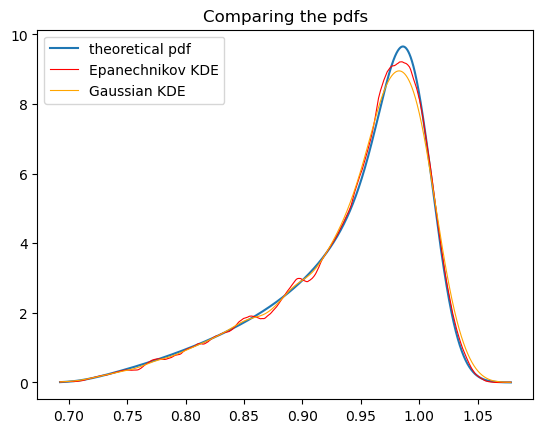

In [15]:
def I(t, ff, Mu, sig):
    return (np.sqrt(2/np.pi)/sig)*np.exp(-(t/ff-Mu)*(t/ff-Mu)/(2*sig*sig))*(2*ff*ff-1)/(ff*np.sqrt(1-ff*ff))

Massa_irr_theo = [scipy.integrate.quad(lambda f: I(xx, f, mu, sigma), 1/np.sqrt(2), 1)[0] for xx in x]

plt.plot(x, Massa_irr_theo, label='theoretical pdf')
plt.plot(x, pdfE, color='red', label='Epanechnikov KDE', lw=0.8)
plt.plot(x, pdfG, color='orange', label='Gaussian KDE', lw=0.8)
plt.legend()
plt.title('Comparing the pdfs')
plt.show()